In [3]:
from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [86]:

def rand_walk (d_n, t_n):
    """define random walk 
    parameter:d_n is number of randomwalk
    parameter:t_n is length of each randomwalk
    """
    np.random.seed(0)
    return np.insert(np.cumsum(np.random.randn(t_n,d_n),axis=0),0,0,axis = 0)
    
def draw_randwalk(d_n,t_n):
    """draw the random walk.
    parameter:d_n is number of randomwalk
    parameter:t_n is length of each randomwalk
    """
    f = rand_walk(d_n,t_n)
    plt.plot(range(t+1),f)
    plt.show()



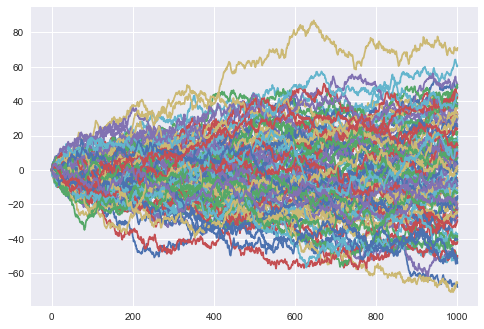

In [87]:
draw_randwalk(100,1000)

In [143]:
#d = numb of data, t = time seirese length
d = 100
t = 1000

#make random walk data set.
""" df[0] is timeseriese 1, each timeserieses are vertical serieses."""
f= rand_walk(d,t)
df = pd.DataFrame(f)
df



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599,...,-0.403177,1.222445,0.208275,0.976639,0.356366,0.706573,0.010500,1.785870,0.126912,0.401989
2,3.647203,-0.947602,-0.291747,3.210290,0.694435,0.966343,0.536469,-0.898812,1.819723,1.891113,...,-1.696034,1.489496,0.168992,-0.191454,0.879643,0.535027,0.782291,2.609375,2.290148,1.738517
3,3.278021,-1.186981,0.807913,3.865554,1.334566,-0.650613,0.512143,-1.636843,2.099648,1.792963,...,-2.324121,1.008469,2.472909,-1.251470,0.743693,1.671918,0.880016,3.192328,1.890699,2.108573
4,1.971494,0.471150,0.689749,3.185375,2.000949,-1.111333,-0.822115,-2.983560,2.793421,1.633389,...,-1.756831,0.785794,2.119477,-2.867944,0.451856,0.910426,1.737939,4.333430,3.357278,2.961125
5,1.372840,-0.644747,1.456412,3.541668,0.232411,-0.755851,-0.007595,-2.924635,2.608367,0.825741,...,-2.786766,0.435850,3.219761,-1.569923,3.148080,0.836501,1.079386,3.819196,2.339236,2.883270
6,1.755573,-0.678990,2.552759,3.307452,-0.115040,-1.337119,-1.640230,-4.492403,1.429209,2.127169,...,-2.243455,0.874893,3.000220,-2.653959,3.499860,1.215737,0.609354,3.602465,1.409079,2.704681
7,0.205144,-0.261671,1.608390,3.545556,-1.521003,-1.927177,-1.750719,-6.153102,1.544357,1.748021,...,-1.912878,1.824140,1.497824,-4.431626,2.967157,2.306487,0.263104,2.807828,1.607047,3.786617
8,-1.239797,-1.472214,0.819721,4.640194,-1.286181,0.204977,-0.814274,-6.188198,2.809435,1.959518,...,-2.670749,1.774056,0.600423,-3.119156,2.108185,1.407544,0.337691,1.730729,1.182383,2.956652
9,0.171375,-0.686410,0.762251,4.248977,-0.345264,0.610181,-0.316221,-6.214390,1.121205,1.847053,...,-3.317930,2.246303,1.530831,-3.294472,0.686265,3.405501,-0.518859,0.189142,3.776808,2.552620


In [95]:
def std():
    """
    call kth standard deviation for df.
    it must be called after declare df.
    """
    return df.std(axis=1)

def cov_randwalk (k_1, k_2):
    """
    call kth standard deviation for df.
    it must be called after declare df.
    k_1, k_2 are must be smaller than timeseriese length t_n
    """
    k = np.array([(df.iloc[k_1-1] - df.iloc[k_1-1].mean())])
    kk = np.array([(df.iloc[k_2-1] - df.iloc[k_2-1].mean())])
    
    return (k * k.T).sum().sum()



0        0.000000
1        1.012960
2        1.530627
3        1.875454
4        2.156983
5        2.371172
6        2.730187
7        2.921427
8        2.941091
9        3.150286
10       3.202879
11       3.402057
12       3.665592
13       3.900743
14       3.946571
15       4.048227
16       4.214859
17       4.212827
18       4.313531
19       4.385979
20       4.353215
21       4.559196
22       4.655203
23       4.886455
24       4.937876
25       5.053927
26       5.164859
27       5.076525
28       5.205283
29       5.407308
          ...    
971     28.817254
972     28.730137
973     28.831483
974     28.876751
975     28.957950
976     29.119930
977     29.245806
978     29.146860
979     28.966288
980     29.064006
981     29.087731
982     29.015349
983     29.194245
984     29.242309
985     29.232086
986     29.346352
987     29.283096
988     29.422578
989     29.520035
990     29.618908
991     29.834471
992     29.922812
993     30.113665
994     30.418771
995     30

In [144]:
std()
""" you can see that std are proportional to root of random walk happend number"""

0        0.000000
1        1.012960
2        1.530627
3        1.875454
4        2.156983
5        2.371172
6        2.730187
7        2.921427
8        2.941091
9        3.150286
10       3.202879
11       3.402057
12       3.665592
13       3.900743
14       3.946571
15       4.048227
16       4.214859
17       4.212827
18       4.313531
19       4.385979
20       4.353215
21       4.559196
22       4.655203
23       4.886455
24       4.937876
25       5.053927
26       5.164859
27       5.076525
28       5.205283
29       5.407308
          ...    
971     28.817254
972     28.730137
973     28.831483
974     28.876751
975     28.957950
976     29.119930
977     29.245806
978     29.146860
979     28.966288
980     29.064006
981     29.087731
982     29.015349
983     29.194245
984     29.242309
985     29.232086
986     29.346352
987     29.283096
988     29.422578
989     29.520035
990     29.618908
991     29.834471
992     29.922812
993     30.113665
994     30.418771
995     30

In [146]:
print (cov_randwalk(10,30))
print (cov_randwalk(10,40))
print (cov_randwalk(10,100))
print (cov_randwalk(10,200))
print("You can see the cov are unchanged when t_2 > t_1 value are changing")
print (cov_randwalk(10,400))
print (cov_randwalk(20,400))
print (cov_randwalk(30,400))
print (cov_randwalk(40,400))
print ("You can see the cov are changed when we change the t_1 < t_2")

3.5527136788e-13
3.5527136788e-13
3.5527136788e-13
3.5527136788e-13
You can see the cov are unchanged when t_2 > t_1 value are changing
3.5527136788e-13
-1.4921397451e-13
-5.11590769747e-13
5.68434188608e-13
You can see the cov are changed when we change the t_1 < t_2
